In [1]:
# import fasttext
# import pandas as pd
import re

In [2]:
# # model = fasttext.train_supervised(input=TRAIN_FILEPATH, lr=1.0, epoch=100,
# #                              wordNgrams=2, bucket=200000, dim=300, loss='hs',
# #                              pretrainedVectors=VECTORS_FILEPATH)
def clean_str(string):
    """
    Tokenization/string cleaning for all datasets except for SST.
    Every dataset is lower cased except for TREC
    """
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)     
    string = re.sub(r",", " ", string) 
    string = re.sub(r"!", " ", string) 
    string = re.sub(r"\(", " ", string) 
    string = re.sub(r"\)", " ", string) 
    string = re.sub(r"\?", " ", string) 
    string = re.sub(r"\s{2,}", " ", string)   
    string = re.sub(" \d+", " ", string)
    return  string.strip().lower()

In [3]:
import pandas as pd
TRAIN_FILEPATH = "../Translated/cleaned/train.csv"
TEST_FILEPATH = "../Translated/cleaned/test.csv"
SS_FILEPATH = "../data/SampleSubmission.csv"
VECTORS_FILEPATH = ""
train = pd.read_csv(TRAIN_FILEPATH)
test = pd.read_csv(TEST_FILEPATH)
ss = pd.read_csv(SS_FILEPATH)

In [4]:
# # train.Text.str.lower().str.split()
# # from collections import Counter
# # result = Counter(" ".join(train['cleaned'].values.tolist()).split(" ")).items()
# # result
train["Text"] =train.Text.apply(lambda x: clean_str(x))
test["Text"] =test.Text.apply(lambda x: clean_str(x))


In [5]:
# train.Text.str.lower().str.split().apply(len).max()
# train
# train.Text[0]
corpus = pd.concat([train.Text, test.Text],axis = 0,ignore_index = True)

In [117]:
from googletrans import Translator
import time
trans = Translator()
# t = []
for c in cor2[len(t):].values : 
    t.append(trans.translate(c).text)
    time.sleep(2)

In [121]:
# t
# len(t)
# len(t)
# t[849]
# len(train)
(pd.DataFrame(t)).to_csv('corpus_translated.csv')

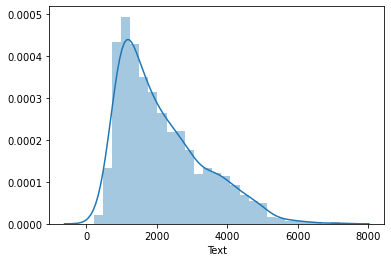

In [65]:
# trans.translate(a,src = 'ny')
# a = corpus[183]
# a
import seaborn as sns

sns.distplot((corpus.str.len()))

In [69]:
# for i in a.split() : 
#     x = trans.translate(i)
# i
# trans.translate('peter',src = 'ny').text
' '.join(a.split()[:4])

'a malawi adalimba nazo'

In [72]:
# len(result)
# test
# result
# corpus = 
# train.Text.values.dtype
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(corpus)
def keep_only(x,string):
    return ' '.join(string.split()[:x])
    

In [85]:
cor2 = corpus.apply(lambda s: keep_only(500,s))

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(cor2)


In [84]:
X.shape

(2056, 53347)

In [42]:
mat = X.toarray()

In [57]:
# tes = mat.prod(axis = 0)
tes['Label'] = train.Label


In [60]:
a = tes.groupby('Label').aggregate('sum')

In [66]:
b = a.values.prod(axis = 0)

In [96]:
# mat.shape
stand = StandardScaler()
mat2 = stand.fit_transform(mat)

In [106]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
pca.fit(mat2)


PCA(n_components=0.99)

In [107]:
data_new = pca.transform(mat2)

In [108]:
X_train = data_new[:train.shape[0]]

In [109]:
X_train = pd.DataFrame(X_train)
X_train['Label'] = train['Label']
X_test = pd.DataFrame(data_new[train.shape[0]:])

In [110]:
X_train['ID'] = train['ID']
X_test['ID'] = test['ID']


In [111]:
from sklearn.preprocessing import LabelBinarizer, StandardScaler
lb = LabelBinarizer()
y_train_b = lb.fit_transform(train['Label'])

In [112]:
features = X_train.columns[:-2]

In [113]:
X_train.iloc[:,0]

0       -1.126357
1       -0.860474
2       -0.529630
3       -0.765032
4       -0.518144
          ...    
1431    -0.769060
1432    -1.618650
1433    18.525993
1434    -1.273803
1435    -1.536207
Name: 0, Length: 1436, dtype: float64

In [114]:
len(features)

1924

In [54]:
# tes = pd.DataFrame(mat[:train.shape[0]])

In [122]:
# train.Text[0]
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import keras
from keras import optimizers
from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D 
from keras.utils import plot_model
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
import nltk
nltk.download('stopwords')
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
import os, re, csv, math, codecs
from sklearn.preprocessing import LabelBinarizer
sns.set_style("whitegrid")
np.random.seed(0)

DATA_PATH = '../data'
EMBEDDING_DIR = '../Vectors'

MAX_NB_WORDS = 100000
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))
stop_words.update(['.', ',', '"', "'", ':', ';', '(', ')', '[', ']', '{', '}'])

C:\Users\amakr\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amakr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [115]:
# print('loading word embeddings...')
# embeddings_index = {}
# f = codecs.open('../Vectors/wiki.ny.vec', encoding='utf-8')
# for line in tqdm(f):
#     values = line.rstrip().rsplit(' ')
#     word = values[0]
#     coefs = np.asarray(values[1:], dtype='float32')
#     embeddings_index[word] = coefs
# f.close()
# print('found %s word vectors' % len(embeddings_index))

In [116]:
# model = fasttext.load_model()
# train[train.Label == "POLITICS"].Text[0]

In [117]:
# dir(model)
# print("num train: ", train.shape[0])
# print("num test: ", test.shape[0])

# label_names = train.Label.unique().tolist()
# y_train = train.Label.values

# # #visualize word distribution
# train['doc_len'] = train['Text'].apply(lambda words: len(words.split(" ")))
# max_seq_len = np.round(train['doc_len'].mean() + train['doc_len'].std()).astype(int)
# sns.distplot(train['doc_len'], hist=True, kde=True, color='b', label='doc len')
# plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
# plt.title('article length'); plt.legend()
# plt.show()

In [118]:
# # # model.predict(train.cleaned[0])
# # model = fasttext.train_supervised(input=TRAIN_FILEPATH, lr=1.0, epoch=100,
# #                              wordNgrams=2, bucket=200000, dim=300, loss='hs')
# # #                              pretrainedVectors="../Vectors/wiki.ny.vec")
# raw_docs_train = train['Text'].tolist()
# raw_docs_test = test['Text'].tolist() 
# num_classes = len(label_names)

# print("pre-processing train data...")
# processed_docs_train = []
# for doc in tqdm(raw_docs_train):
#     tokens = tokenizer.tokenize(doc)
#     filtered = [word for word in tokens if word not in stop_words]
#     processed_docs_train.append(" ".join(filtered))
# #end for

# processed_docs_test = []
# for doc in tqdm(raw_docs_test):
#     tokens = tokenizer.tokenize(doc)
#     filtered = [word for word in tokens if word not in stop_words]
#     processed_docs_test.append(" ".join(filtered))
# #end for

# print("tokenizing input data...")
# tokenizer = Tokenizer(num_words=MAX_NB_WORDS+1, lower=True, char_level=False)
# tokenizer.fit_on_texts(processed_docs_train + processed_docs_test)  #leaky
# word_seq_train = tokenizer.texts_to_sequences(processed_docs_train)
# word_seq_test = tokenizer.texts_to_sequences(processed_docs_test)
# word_index = tokenizer.word_index
# print("dictionary size: ", len(word_index))

# #pad sequences
# word_seq_train = sequence.pad_sequences(word_seq_train, maxlen=max_seq_len)
# word_seq_test = sequence.pad_sequences(word_seq_test, maxlen=max_seq_len)

In [119]:
# train.Text
# i
# word_index

In [238]:
# word_seq_train.shape
#training params
batch_size = 64 
num_epochs =  50

#model parameters
num_filters = 64 
embed_dim = 300 
weight_decay = 1e-3

In [239]:
# print('preparing embedding matrix...')
# words_not_found = []
# nb_words = min(MAX_NB_WORDS, len(word_index))
# embedding_matrix = np.zeros((nb_words, embed_dim))
# for word, i in word_index.items():
#     if i >= nb_words:
#         continue
#     embedding_vector = embeddings_index.get(word)
#     if (embedding_vector is not None) and len(embedding_vector) > 0:
#         # words not found in embedding index will be all-zeros.
#         embedding_matrix[i] = embedding_vector
#     else:
#         words_not_found.append(word)
# print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

In [138]:
# print("sample words not found: ", np.random.choice(words_not_found, 100))
# len(words_not_found)
# lb = LabelBinarizer()
# y_train_b = lb.fit_transform(y_train) 
X_train[features][56]

0      -0.247346
1      -0.816465
2      -0.603540
3       0.370478
4      -0.201107
          ...   
1431   -0.830241
1432   -4.398766
1433    7.091032
1434    1.153235
1435   -4.859901
Name: 56, Length: 1436, dtype: float64

In [131]:
# y_train_b[0]
num_classes = y_train_b.shape[1]

In [202]:
X_train[features].max()

0        81.021802
1        89.284926
2       143.630518
3        11.769739
4       375.905040
           ...    
1919     46.571552
1920     51.781500
1921     58.180361
1922     60.925842
1923     38.065951
Length: 1924, dtype: float64

In [246]:
print("training CNN ...")
model = Sequential()
model.add(keras.Input(shape=(X_train.shape[1]-2,1)))
# model.add(Embedding(63440, embed_dim, trainable=False))
# Conv1D(filters=1, kernel_size=10 ,strides=10,     
#                   ,kernel_initializer= 'uniform',      
#                   activation= 'relu')
model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Dense(num_classes, activation='sigmoid'))  #multi-label (k-hot encoding)

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

training CNN ...
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_46 (Conv1D)           (None, 1924, 64)          512       
_________________________________________________________________
max_pooling1d_25 (MaxPooling (None, 962, 64)           0         
_________________________________________________________________
conv1d_47 (Conv1D)           (None, 962, 64)           28736     
_________________________________________________________________
max_pooling1d_26 (MaxPooling (None, 481, 64)           0         
_________________________________________________________________
conv1d_48 (Conv1D)           (None, 481, 64)           28736     
_________________________________________________________________
max_pooling1d_27 (MaxPooling (None, 240, 64)           0         
_________________________________________________________________
conv1d_49 (Conv1D)           (None, 

In [247]:
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=6, verbose=1)
callbacks_list = [early_stopping]
# y_train = np.asarray(y_train).reshape((-1,1))


In [248]:
hist = model.fit(X_train[features].values.reshape(X_train[features].shape[0],X_train[features].shape[1],1 ), y_train_b, batch_size=batch_size, epochs=num_epochs,shuffle = True, callbacks=callbacks_list, validation_split=0.1, verbose=2)

Epoch 1/50
21/21 - 7s - loss: 0.3716 - accuracy: 0.0921 - val_loss: 0.2726 - val_accuracy: 0.0972
Epoch 2/50
21/21 - 7s - loss: 0.2809 - accuracy: 0.1385 - val_loss: 0.2608 - val_accuracy: 0.2014
Epoch 3/50
21/21 - 7s - loss: 0.2666 - accuracy: 0.1486 - val_loss: 0.2526 - val_accuracy: 0.1944
Epoch 4/50
21/21 - 7s - loss: 0.2535 - accuracy: 0.1827 - val_loss: 0.2453 - val_accuracy: 0.2014
Epoch 5/50
21/21 - 7s - loss: 0.2457 - accuracy: 0.1587 - val_loss: 0.2369 - val_accuracy: 0.2014
Epoch 6/50
21/21 - 7s - loss: 0.2349 - accuracy: 0.1950 - val_loss: 0.2323 - val_accuracy: 0.1944
Epoch 7/50
21/21 - 7s - loss: 0.2254 - accuracy: 0.1803 - val_loss: 0.2194 - val_accuracy: 0.2014
Epoch 8/50
21/21 - 7s - loss: 0.2131 - accuracy: 0.1749 - val_loss: 0.2080 - val_accuracy: 0.2014
Epoch 00008: early stopping


In [ ]:
# len(train.Label.unique().tolist())
# word_seq_train.shape
# labels
a = model.predict(word_seq_test)
# word_seq_train.max()
# word_seq_test.shape

In [ ]:
# word_seq_train.shape
# a[0]
word_seq_test.max()

In [ ]:
# logits
y_train_b[0]*a[0]

In [ ]:
word_seq_train.shape

In [ ]:
y_train.shape

In [113]:
from googletrans import Translator


In [114]:
translator = Translator()
# train.Text[0]

In [116]:
# translator.translate('안녕하세요.')

In [118]:
# cleaned_train = pd.read_csv('../Translated/cleaned/train.csv')
# test.char_len.max()
# train.Text.to_csv('../Translated/train1.csv',index = False)

In [120]:
# cleaned_train.Text.to_csv('../Translated/train1.csv',index = False)
# plt.figure()
# plt.hist(test['char_len'])
# plt.show()

In [59]:
# 1436*2
train['char_len'] = train['Text'].apply(lambda x: len(str(x)))
test['char_len'] = test['Text'].apply(lambda x: len(str(x)))


In [62]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features=5000,stop_words='english')
vect

TfidfVectorizer(max_features=5000, stop_words='english')

In [63]:
X_dtm = vect.fit_transform(train.Text)


In [65]:
# X_dtm
test_X_dtm = vect.transform(test.Text)


In [66]:
from keras.preprocessing import text

In [67]:
tokenizer = text.Tokenizer()

In [68]:
tokenizer.fit_on_texts(train.Text)

In [74]:
a = tokenizer.texts_to_sequences(train.Text)

In [79]:
max(max(a))

49694

In [78]:
a = tokenizer.texts_to_sequences(test.Text)

In [82]:
len(set(a[0]))

170

In [222]:
A = X_train[features]

In [225]:
X_train[features].reshape(-1,X_train[features].shape[0],X_train[features].shape[1] )

AttributeError: 'DataFrame' object has no attribute 'reshape'